# Streamlit in Snowflak (SIS)

In this notebook we are using Snowflake CLI (snow cli) to deploy a streamlit app in snowflake.

If you have not used snow cli before, take a look at the documentation  [Introduction Snowflake CLI](https://docs.snowflake.com/en/developer-guide/snowflake-cli/introduction/introduction).

## Installing Snowflake CLI

There are several option to install snowflake cli, such as:

- [Install using Linux package managers (rpm, deb)](https://docs.snowflake.com/en/developer-guide/snowflake-cli/installation/installation#label-snowcli-install-linux-package-managers).

- [Install using MacOS installer](https://docs.snowflake.com/en/developer-guide/snowflake-cli/installation/installation#label-snowcli-install-macos-installer).

- [Install using Windows installer](https://docs.snowflake.com/en/developer-guide/snowflake-cli/installation/installation#label-snowcli-install-windows-installer).

- [Install using Homebrew](https://docs.snowflake.com/en/developer-guide/snowflake-cli/installation/installation#label-snowcli-install-homebrew).

```bash
uv venv --python 3.11

source .venv/bin/activate

uv pip install snowflake-cli
```

In [1]:
!snow --help

                                                                                
 Usage: snow [OPTIONS] COMMAND [ARGS]...                                        
                                                                                
 Snowflake CLI tool for developers [v3.7.0]                                     
                                                                                
╭─ Options ────────────────────────────────────────────────────────────────────╮
│ --help                -h            Show this message and exit.              │
│ --version                           Shows version of the Snowflake CLI       │
│ --info                              Shows information about the Snowflake    │
│                                     CLI                                      │
│ --config-file                 FILE  Specifies Snowflake CLI configuration    │
│                                     file that should be used                 │
│                           

### Configuring Snowflake cli connection

Snowflake cli uses a global configuration file called config.toml to configure connections and logs for snowflake CLI.

You can add a connection using command:

```bash
snow connection add
```

Check [Managing Snowflake connections guide](https://docs.snowflake.com/en/developer-guide/snowflake-cli/connecting/configure-connections) for help on how to add and test connection in snowflake cli.

Below you see the output while executing: 
```bash 
snow connection test
```

```markdown
+--------------------------------------------------+
| key             | value                          |
|-----------------+--------------------------------|
| Connection name | myconnection2                  |
| Status          | OK                             |
| Host            | example.snowflakecomputing.com |
| Account         | myaccount2                     |
| User            | jdoe2                          |
| Role            | myrole                         |
| Database        | mydatabase                     |
| Warehouse       | mywarehouse                    |
+--------------------------------------------------+
```

## Managing Streamlit app with Snowflake cli

In this guideline we have already created the streamlit app using [snowflake cli templates](https://github.com/snowflakedb/snowflake-cli-templates/).

You can check the project definition for our streamlit app in [snowflake.yml](./snowflake.yml).

For detailed information of each property in the file [snowflake.yml](./snowflake.yml) file check [Create the project definition for a Streamlit app](https://docs.snowflake.com/en/developer-guide/snowflake-cli/streamlit-apps/manage-apps/initialize-app#create-the-project-definition-for-a-streamlit-app).

### Deploying our streamlit app

In order to deploy the streamlit app using snowflake cli we should have the following pre-requisites:

- snowflake.yml file containing the projkect definition and correct directory structure

- account with correct priveledges as in [Privileges required to create and use a Streamlit app](https://docs.snowflake.com/en/developer-guide/streamlit/getting-started.html#label-streamlit-access-requirements).

- Able to create or have access to a named stage where you can upload the streamlit app files.

In order to deploy the app, execute the following command:

In [7]:
!snow streamlit deploy --prune

Deploying files to @LLMDEMO.PUBLIC.streamlit_stage/app
  Creating stage LLMDEMO.PUBLIC.streamlit_stage if not exists.
  Performing a diff between the Snowflake stage: streamlit_stage/app and your local deploy_root: /Users/mcastro/Documents/github/sfc-gh-mcastro/sfguide-call-centre-analytics-with-snowflake-cortex-and-spcs/streamlit_sis/output/bundle/streamlit.
  Local changes to be deployed:
    modified: common/hello.py -> common/hello.py
    modified: environment.yml -> environment.yml
    modified: pages/audio_analytics.py -> pages/audio_analytics.py
    modified: pages/chatbot.py -> pages/chatbot.py
    modified: pages/resource_allocation_efficiency.py -> pages/resource_allocation_efficiency.py
    modified: src/Chatbot.py -> src/Chatbot.py
    modified: src/aboutapp.py -> src/aboutapp.py
    modified: src/audiofile_analytics.py -> src/audiofile_analytics.py
    modified: src/functions.py -> src/functions.py
    modified: src/readme.md -> src/readme.md
    modified: src/resourceallo

You can find further description of the syntax of ```snow streamlit deploy``` [here](https://docs.snowflake.com/en/developer-guide/snowflake-cli/command-reference/streamlit-commands/deploy).

The following commands might be also usefull:

- ```snow streamlit drop <your app name>``` : drop the app from snowflake

- ```snow streamlit get-url <your app name>```: get URL of your deployed streamlit app

- ```snow streamlit list```: list streamlit apps you has access to

- ```snow streamlit describe <your app name>``` : display details about your streamlit app

Below is how the streamlit app deployed looks like:


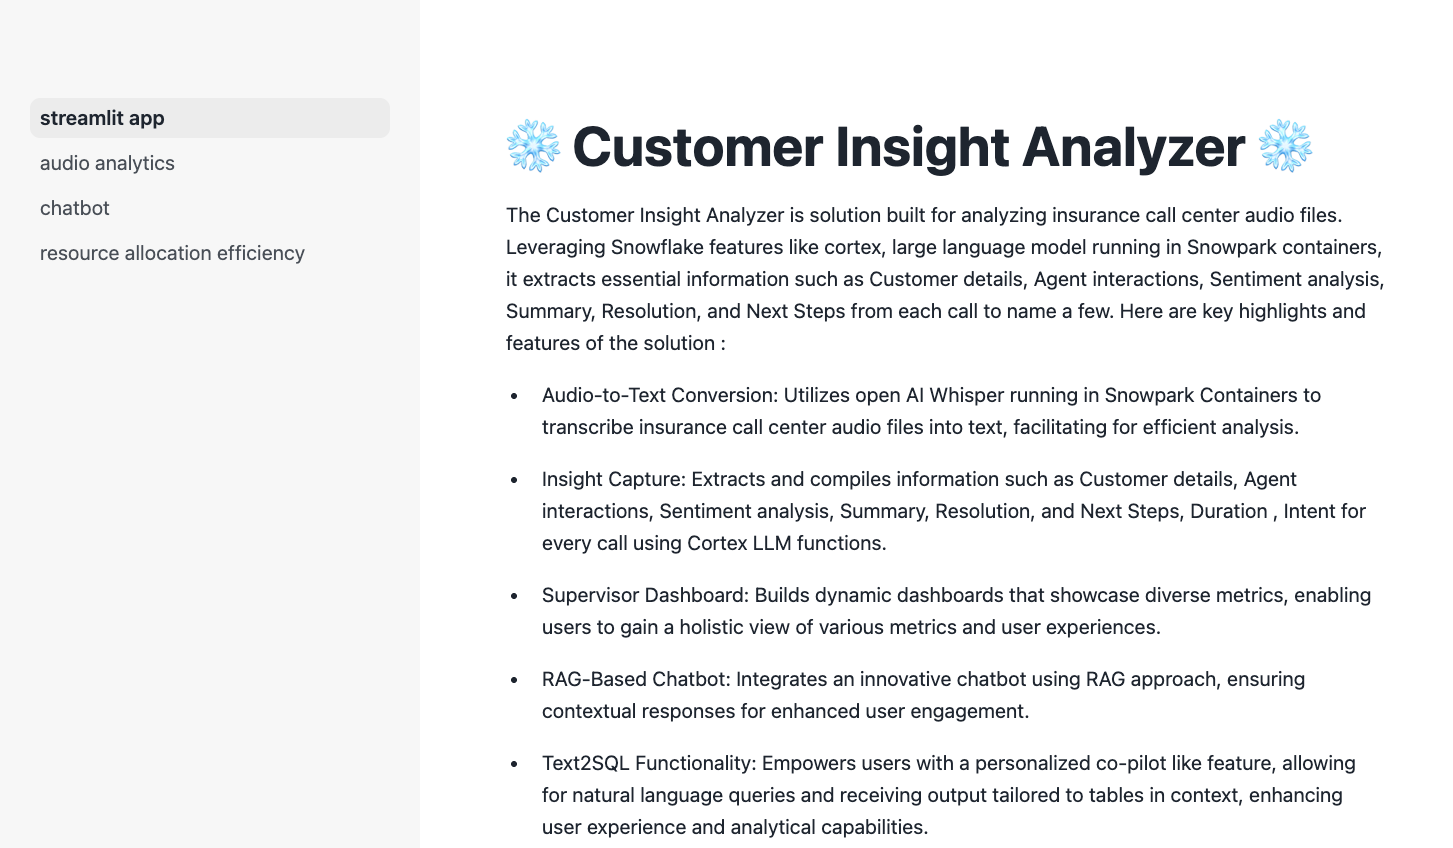